In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# STUDENT SCORE PREDICTION

This scenario entails a regression analysis aimed at forecasting a student's percentage score contingent on the amount of time they devoted to studying. The dataset encompasses two key columns: "Hours," denoting the study duration, and "Scores," representing the resultant percentage achieved by the student in an examination.

The dataset you provided is a sample of such data, and it consists of pairs of hours studied and the respective percentage

#### **AIM:To predict the percentage score of a student based on the number of study hours**


![](https://static.vecteezy.com/system/resources/thumbnails/002/173/392/small/student-studying-at-home-free-vector.jpg)

#### **Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### **Loading the dataset**

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')



In [4]:
# Displaying the dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Concise information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Descriptive statistics of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Checking for null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### **Exploratory Data Analysis**

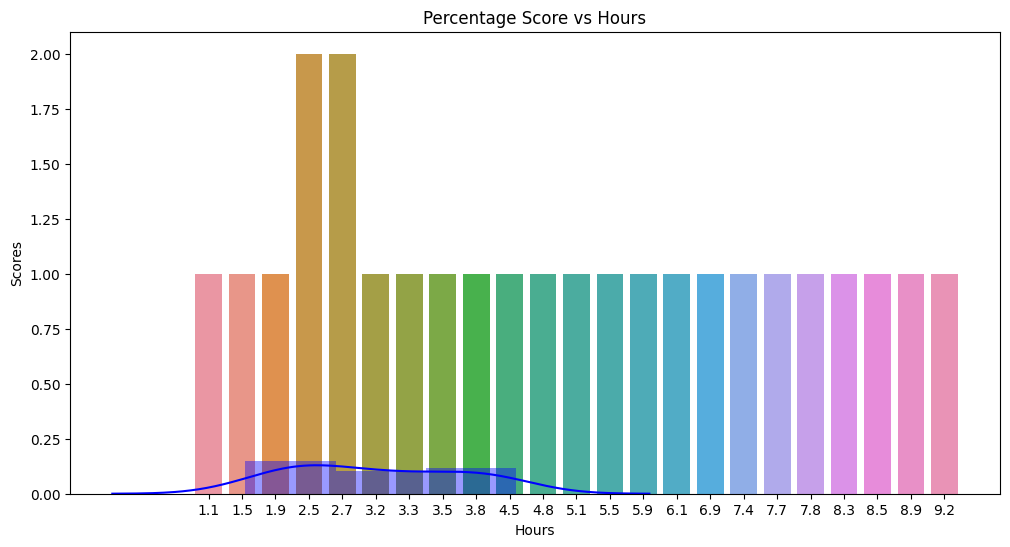

In [8]:
# Create a bargraph

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
sns.distplot(df['Hours'], color='blue', kde=True)

plt.title('Percentage Score vs Hours')
plt.show()

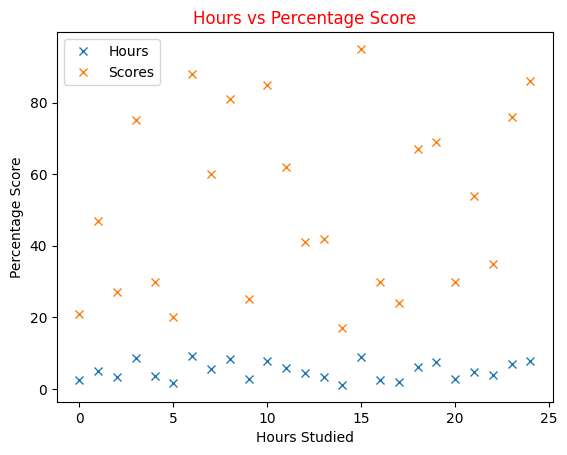

In [9]:
# Plotting the dataset


df.plot(kind='line', style='x')
plt.title("Hours vs Percentage Score", color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

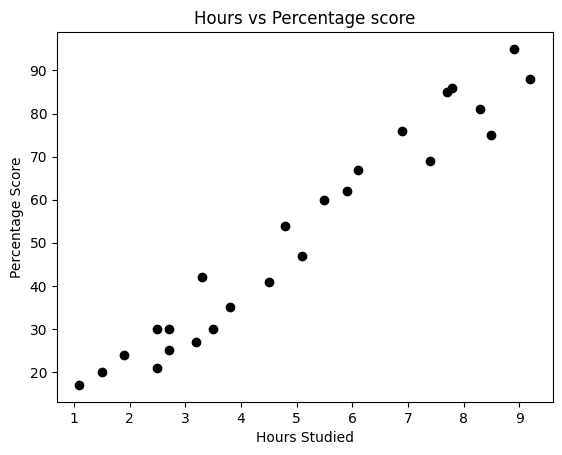

In [10]:
# Creating a scatter plot

plt.scatter(x=df.Hours, y=df.Scores, color='black')
plt.title('Hours vs Percentage score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### **Splitting the data**

In [11]:
X= df.iloc[:, :-1].values
Y= df.iloc[:,1].values

In [12]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

#### **Model Training**

In [13]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
# Plotting the regression line

line = model.coef_ * X + model.intercept_

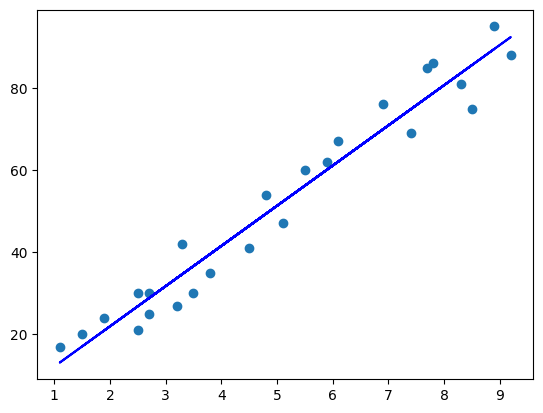

In [15]:
# Plotting for test data

plt.scatter(X,Y)
plt.plot(X, line, color='blue')
plt.show()

In [16]:
# Making predictions

pred=model.predict(x_test)

In [17]:
# Comparison of actual data and predicted data

d1= pd.DataFrame({'Actual data': y_test, "Predicted data": pred})
d1

,Actual data,Predicted data
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [18]:
# Predicting the score for a student who studies for 9.25 hours per day

time = 9.25
pred1 = model.predict([[time]])
print("Number of Hours :", time)
print("Predicted score is :", pred1[0])

Number of Hours : 9.25
Predicted score is : 92.91505723477056


#### **Model Evaluation**

In [19]:
from sklearn.metrics import mean_absolute_error

# Calculating MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test,pred)
print("Mean Absolute Error: ",mae)




Mean Absolute Error:  4.419727808027651
